# Demonstration of the use of the DNS Panoramic Images dataset

## Imports

In [1]:
import cv2
import json
import random

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from conversions import annotations2mask, mask2instances, get_bbox_coordinates

## Inputs

In [2]:
SAMPLE_IMG_PATH = './dns-panoramic-images/instance-segmentation/folds/fold5/images/cate1-00001.jpg'
DNS_JSON_FILEPATH = './dns-panoramic-images/instance-segmentation/complete-json/dns-panoramic-images.json'

## Categories mapping

In [3]:
# map a category id to a tooth number
id2num = {}
id = 0
for i in range(1, 5):
    for j in range(1, 9):
        id += 1
        id2num[str(id)] = 10*i + j

## Show a sample image

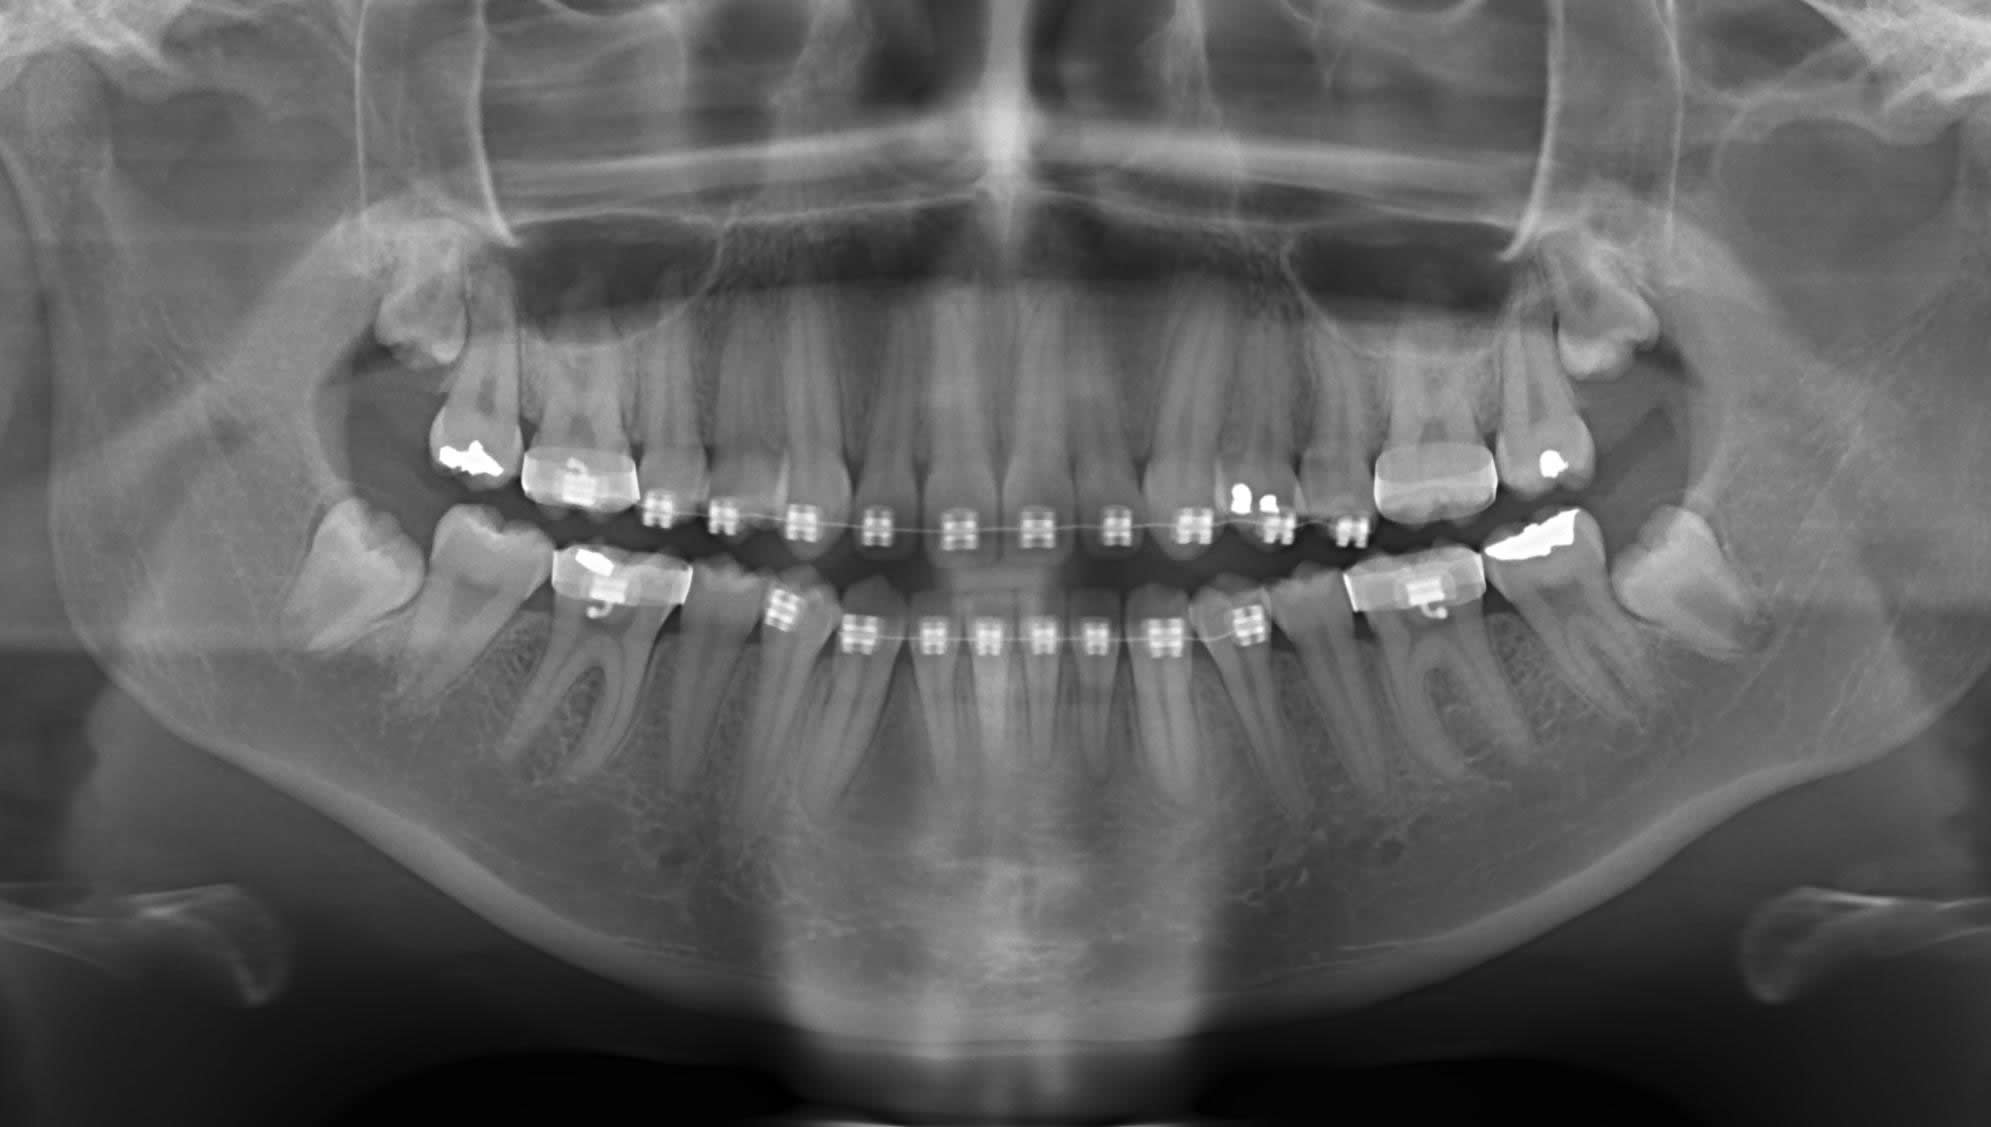

In [4]:
sample_image = Image.open(SAMPLE_IMG_PATH)
sample_image

## Basic Statistics

In [5]:
json_file = open(DNS_JSON_FILEPATH, 'r')
json_data = json.load(json_file)

info = json_data['info']
licenses = json_data['licenses']
images = json_data['images']
categories = json_data['categories']
annotations = json_data['annotations']

print('Number of images:', len(images))
print('Number of categories:', len(categories))
print('Number of annotations:', len(annotations))

Number of images: 543
Number of categories: 32
Number of annotations: 16211


## Json to Mask Conversion

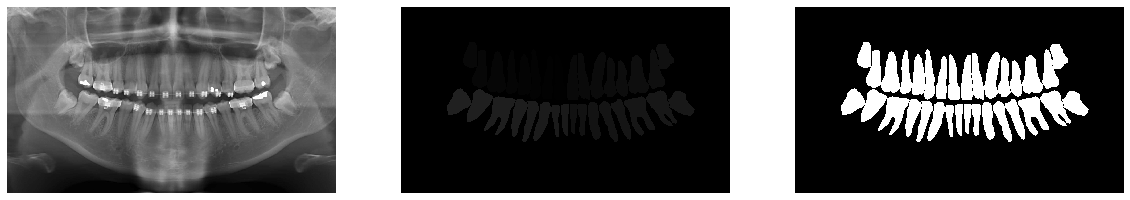

In [6]:
# get image id
sample_img_name = SAMPLE_IMG_PATH.split('/')[-1]
sample_image_json = list(filter(lambda x: x['file_name'] == sample_img_name, images))[0]
sample_image_id = sample_image_json['id'] 

# get the image annotations
sample_annotations = [ann for ann in annotations if ann['image_id'] == sample_image_id]

# get non-binary and binary mask
height, width = sample_image_json['height'], sample_image_json['width']
mask = annotations2mask(sample_annotations, height, width)
binary_mask = annotations2mask(sample_annotations, height, width, binary=True)

# compare masks and images
orig_image = plt.imread(SAMPLE_IMG_PATH)
normalize = False # turn this to true for better contrast
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
for ax, img in zip(axs, [orig_image, mask, binary_mask]):
    ax.axis('off')
    if normalize:
        ax.imshow(img/255., cmap='gray')
    else:
        ax.imshow(img/255., cmap='gray', vmin=0, vmax=1)

## Get the instances from the non-binary mask

Sample of tooth number 44
Sample of tooth number 25
Sample of tooth number 41


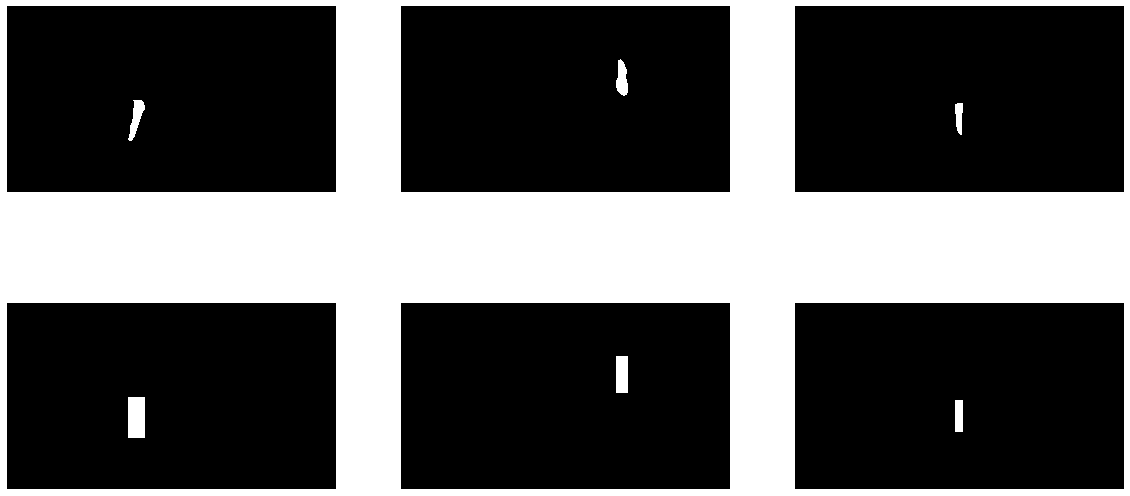

In [7]:
masks, bboxes, cat_ids = mask2instances(mask)

# show three random instances
num_sample = 3
random.seed(0)
random_numbers = random.sample(range(0, len(masks)-1), num_sample)

# plot instance masks and bounding boxes
fig, axs = plt.subplots(nrows=2, ncols=num_sample, figsize=(20, 10))
for idx, r in enumerate(random_numbers):
    bbox_mask = np.zeros((mask.shape))
    bbox_coord = get_bbox_coordinates(bboxes[r, :])
    bbox_mask = cv2.fillPoly(bbox_mask, [bbox_coord], 1)

    print("Sample of tooth number {}".format(id2num[str(cat_ids[r])]))
    axs[0, idx].axis('off')
    axs[0, idx].imshow(masks[r], cmap='gray')
    axs[1, idx].axis('off')
    axs[1, idx].imshow(bbox_mask, cmap='gray')
